In [106]:

# TimeSeries - Block Maxima
from pydoc import describe
from unicodedata import decimal
from pyextremes import EVA,get_extremes , __version__
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from scipy.signal import find_peaks
import pdb

In [107]:
def loadCsv(path):
    loader = pd.read_csv(path, index_col=0,delimiter=',', parse_dates=True).squeeze()
    return loader

def loadCsvNoInd(path):
    loader = pd.read_csv(path,delimiter=',', parse_dates=True).squeeze()
    return loader

In [108]:
FILEname1 = 'zarco_data'
FILEname2='joao_data'
FilenNameext1 = '.csvextremes.csv'
FilenNameext2 ='.csvrelated2extrems.csv'


FILE1 = FILEname1+FilenNameext1
FILE2 =FILEname1+FilenNameext2
FILE3 =FILEname2+FilenNameext1
FILE4=FILEname2+FilenNameext2
UPTOCOLUMN= 5
data1a = loadCsv(FILE1)
data1b=loadCsvNoInd(FILE2)
data2a = loadCsv(FILE3)
data2b=loadCsvNoInd(FILE4)
# print(data.head())
# print(data.describe())
print(data1b.info())
# data.dropna(inplace=True)
print(data1b.info())
print(data1b.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Humidity            70 non-null     float64
 1   Temperature         70 non-null     float64
 2   cloudcover          70 non-null     float64
 3   windspeedKmph       70 non-null     float64
 4   Solar w/m2          70 non-null     float64
 5   Diffuse Solar w/m2  70 non-null     float64
 6   Produzida           70 non-null     float64
 7   year                70 non-null     int64  
 8   month               70 non-null     int64  
 9   day                 70 non-null     int64  
 10  timestamp           70 non-null     object 
dtypes: float64(7), int64(3), object(1)
memory usage: 6.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  

In [109]:
print(data2b)

    Humidity  Temperature  cloudcover  windspeedKmph  Solar w/m2  \
0      67.00        23.00       23.00          17.00      373.24   
1      63.00        23.00       17.00           8.00      307.24   
2      80.00        18.00       98.00          19.00      335.27   
3      55.00        21.00       44.00          22.00      323.70   
4      61.00        21.00       65.00           6.00      307.47   
..       ...          ...         ...            ...         ...   
64     74.00        22.00       61.00          17.00      384.44   
65     88.00        19.00      100.00          33.00       98.42   
66     67.00        18.00       77.00          22.00      287.01   
67     60.00        18.00       60.00          15.00      248.08   
68     58.00        16.00       74.00          15.00       91.23   

    Diffuse Solar w/m2  Produzida  year  month  day            timestamp  
0               319.52      10.25  2018      8   28  2024-10-08 13:00:00  
1               278.91       5.75

In [110]:
print(data2a)

                time  count
year                       
2018-01-01  13:00:00      2
2018-01-01  14:00:00      2
2018-01-01  15:00:00      1
2018-01-01  16:00:00      4
2019-01-01  13:00:00     13
2019-01-01  14:00:00      2
2019-01-01  15:00:00      6
2019-01-01  16:00:00     11
2020-01-01  13:00:00      3
2020-01-01  14:00:00      3
2020-01-01  15:00:00      7
2020-01-01  16:00:00     15


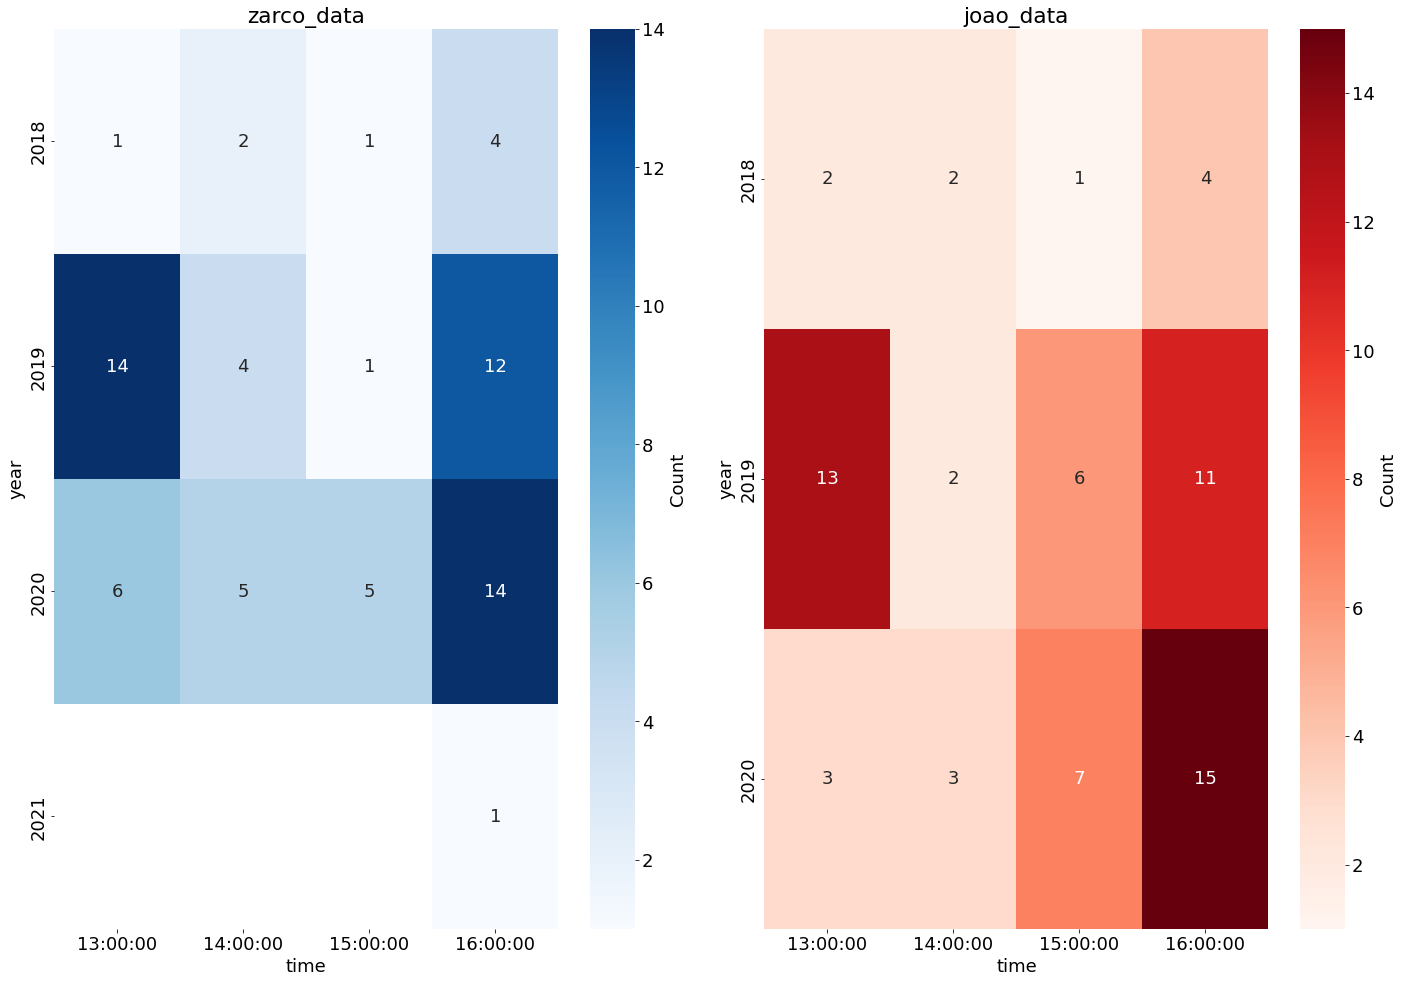

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are the two dataframes you're comparing

# Pivot tables to get years on the rows and times on the columns
pivot1 = data1a.pivot_table(index=data1a.index.year, columns='time', values='count')
pivot2 = data2a.pivot_table(index=data2a.index.year, columns='time', values='count')
# Set global font size
plt.rcParams.update({'font.size': 18})

# Create a figure with two subplots for comparison
plt.figure(figsize=(20, 14))

# Heatmap for the first dataset
plt.subplot(1, 2, 1)
sns.heatmap(pivot1, annot=True, cmap='Blues', cbar_kws={'label': 'Count'})
plt.title(FILEname1)

# Heatmap for the second dataset
plt.subplot(1, 2, 2)
sns.heatmap(pivot2, annot=True, cmap='Reds', cbar_kws={'label': 'Count'})
plt.title(FILEname2)

plt.tight_layout()
plt.show()

In [112]:
# print(data1b.iloc[:,:-5].mean())
# print(data2b.iloc[:,:-5].mean())    

# print(data1b.iloc[:,:-5].mean()- data2b.iloc[:,:-5].mean())
# Delta= data1b.iloc[:,:-5].mean()- data2b.iloc[:,:-5].mean()

In [113]:
def Normalization(min,max,mean):
    return (mean-min)/(max-min)

Normalized1b = Normalization(data1b.iloc[:,:-UPTOCOLUMN].min(),data1b.iloc[:,:-UPTOCOLUMN].max(),data1b.iloc[:,:-UPTOCOLUMN].mean())
Normalized2b = Normalization(data2b.iloc[:,:-UPTOCOLUMN].min(),data2b.iloc[:,:-UPTOCOLUMN].max(),data2b.iloc[:,:-UPTOCOLUMN].mean())
print(data1b.iloc[:,:-5].mean())
print(Normalized1b)

Humidity              67.73
Temperature           18.74
cloudcover            55.46
windspeedKmph         18.50
Solar w/m2           368.73
Diffuse Solar w/m2   241.51
dtype: float64
Humidity             0.48
Temperature          0.52
cloudcover           0.55
windspeedKmph        0.45
Solar w/m2           0.33
Diffuse Solar w/m2   0.50
dtype: float64


In [115]:
Delta= Normalized1b- Normalized2b
print(Delta)

Humidity              0.00
Temperature          -0.02
cloudcover           -0.03
windspeedKmph         0.15
Solar w/m2           -0.01
Diffuse Solar w/m2    0.02
dtype: float64


In [168]:
def Scount(data):
    return data.count()[0]
def ScalingFactor(data1,data2):   
    return round(Scount(data1) / Scount(data2), 3)

print(ScalingFactor(data1b,data2b))

weights = [0.05, 0.1, 0.2,0.05,0.4,0.2]

def BenchmarkingScore(data1, data2, Delta):
    count=-1
    s=[]
    scale = ScalingFactor(data1,data2)
    print(scale)
    for i in Delta:
        count = count+1
        print(i)
        print(weights[count])
        s.append(i*weights[count])
      # return round(i*ScalingFactor,3)

    sumOfvalues =sum(s)
    return scale*sumOfvalues


BenchmarkingScore(data1b,data2b, Delta)   



1.014
1.014
0.002427205849962588
0.05
-0.019966024313850195
0.1
-0.02745755693581775
0.2
0.14608084765756657
0.05
-0.006079131052082021
0.4
0.01638681382573376
0.2


0.000793961189957818